# Feature Selection using Random Forest

## Data inspection

In [1]:
#load pandas and numpy modules
import os 
import pandas as pd
import numpy as np
%matplotlib inline
 
#read raw data (here we used 50% concentration data, 25% conc. data is available on 'neu25').
#df = pd.read_excel('nitrilase_descriptors.xlsx',sheet_name = 'neu50').copy()
#df = pd.read_csv('Oral_health_care_dataset.csv')
df = pd.read_excel('Oral_health_care_dataset.xlsx').copy()


print(df.shape)

df.head(5)

(22288, 45)


,act_caries_p,Sido_No,Region_No,Gender,prev_caries_p,X1,X2,X3,X4_1,X4_2,...,X14_6,X14_7,X14_8,X14_9,x15_1,X16,act_caries_p.1,Calculus,Bleeding,Fluorosis
0,0,14,1,2,1,2,1,2,1,0,...,0,0,0,0,1,3,0,0,0,0
1,0,12,1,2,1,3,1,1,1,0,...,0,0,0,0,3,3,0,0,0,0
2,1,11,1,1,0,4,1,2,0,0,...,0,1,0,0,2,2,1,0,0,0
3,0,25,2,2,1,4,1,2,1,0,...,0,1,0,0,2,1,0,0,0,0
4,0,26,2,1,1,3,1,2,1,0,...,0,1,0,0,1,3,0,0,0,0


In [2]:
#check if this dataframe is missing any values
#check the columns and the data type of each columns
if df.isnull().values.any():
    print ('There are missing values! Check and correct before proceed!')
    raise
else:
    print('There is no missing values in this dataframe.\n')

#inspect data
#print('check data type for each columns:')
#df.info(verbose=True) 

There is no missing values in this dataframe.



#### Create a (version of) folder to save images

In [3]:
#change the version to avoid overwrite
img_dir = './img_V/' 

if not os.path.isdir(img_dir):
    print('Creating image folder {}. Figures will be saved here'.format(img_dir))
    os.mkdir(img_dir)
else:
    print('Image folder "{}" already exist, figures created will overwrite!'.format(img_dir))

Image folder "./img_V/" already exist, figures created will overwrite!


In [4]:
df_cut = df

In [5]:
df_cut.head()

,act_caries_p,Sido_No,Region_No,Gender,prev_caries_p,X1,X2,X3,X4_1,X4_2,...,X14_6,X14_7,X14_8,X14_9,x15_1,X16,act_caries_p.1,Calculus,Bleeding,Fluorosis
0,0,14,1,2,1,2,1,2,1,0,...,0,0,0,0,1,3,0,0,0,0
1,0,12,1,2,1,3,1,1,1,0,...,0,0,0,0,3,3,0,0,0,0
2,1,11,1,1,0,4,1,2,0,0,...,0,1,0,0,2,2,1,0,0,0
3,0,25,2,2,1,4,1,2,1,0,...,0,1,0,0,2,1,0,0,0,0
4,0,26,2,1,1,3,1,2,1,0,...,0,1,0,0,1,3,0,0,0,0


## Data preparation

### Remove highly correlated features.

# of features before drop: 45


<ipython-input-6-4b8ff1de69c3>:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix_before.where(np.triu(np.ones(corr_matrix_before.shape), k=1).astype(np.bool))


# of features after drop: 44
# of features dropped: 1


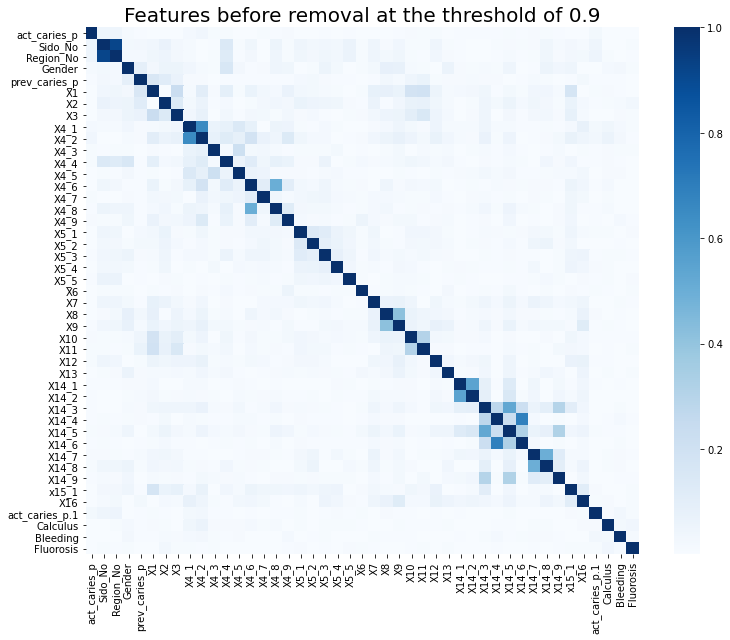

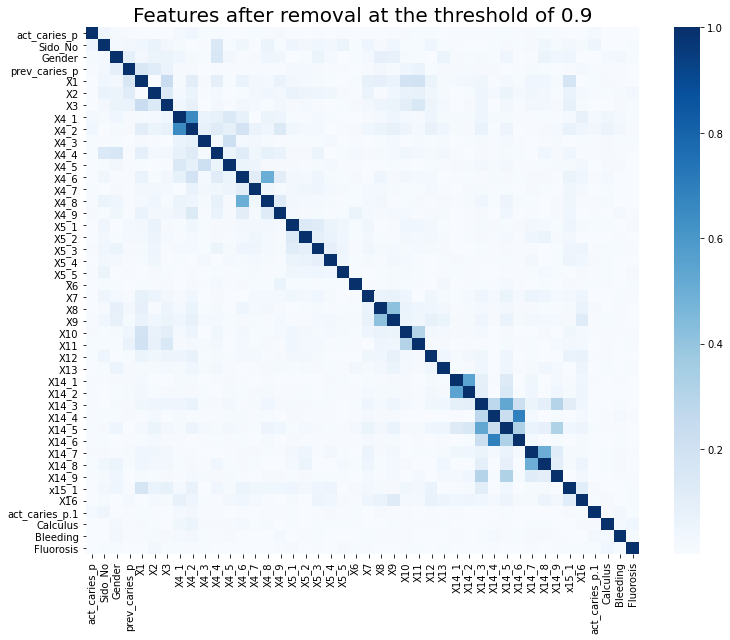

In [6]:
import matplotlib.pyplot as plt

#remove highly correlated features (corr > 90%)
import seaborn as sns

#features
features_pre = df_cut

print('# of features before drop:', features_pre.shape[1])

#create correlation matrix
corr_matrix_before = features_pre.corr().abs()

#set a cutoff threshold (usually 0.9 or 0.85)
cut_th = 0.90

#plot heatmap before removing highly correlated features
f, ax = plt.subplots(figsize=(11, 9))
ax = sns.heatmap(corr_matrix_before, cmap = 'Blues')
plt.title('Features before removal at the threshold of {}'.format(cut_th),fontsize = 20)
plt.tight_layout()
plt.savefig(img_dir + 'corr_matrix_before.png')

#select upper triangle of correlation matrix
upper = corr_matrix_before.where(np.triu(np.ones(corr_matrix_before.shape), k=1).astype(np.bool))

#drop highly correlated features based on set threshold
to_drop = [column for column in upper.columns if any(upper[column] > cut_th)]
df_cut_cor = df_cut.drop(columns = to_drop)

#plot heatmap after removing highly correlated features
corr_matrix_after = df_cut_cor.iloc[:,:].corr().abs()
f, ax = plt.subplots(figsize=(11, 9))
ax = sns.heatmap(corr_matrix_after, cmap = 'Blues')
plt.title('Features after removal at the threshold of {}'.format(cut_th),fontsize = 20)
plt.tight_layout()
plt.savefig(img_dir + 'corr_matrix_after.png')

print('# of features after drop:', features_pre.shape[1]-len(to_drop))
print('# of features dropped:', len(to_drop))

### Data scaling
Note this step may not necccesary for some methods such as tree-based methods.

In [7]:
df.head()

,act_caries_p,Sido_No,Region_No,Gender,prev_caries_p,X1,X2,X3,X4_1,X4_2,...,X14_6,X14_7,X14_8,X14_9,x15_1,X16,act_caries_p.1,Calculus,Bleeding,Fluorosis
0,0,14,1,2,1,2,1,2,1,0,...,0,0,0,0,1,3,0,0,0,0
1,0,12,1,2,1,3,1,1,1,0,...,0,0,0,0,3,3,0,0,0,0
2,1,11,1,1,0,4,1,2,0,0,...,0,1,0,0,2,2,1,0,0,0
3,0,25,2,2,1,4,1,2,1,0,...,0,1,0,0,2,1,0,0,0,0
4,0,26,2,1,1,3,1,2,1,0,...,0,1,0,0,1,3,0,0,0,0


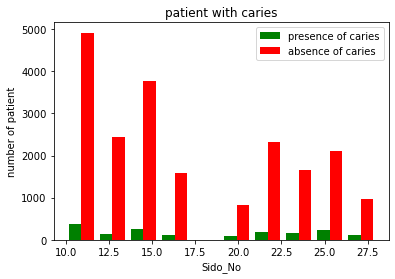

In [8]:
import matplotlib.pyplot as plt

df_0 = df[df.act_caries_p==0].Sido_No
df_1 = df[df.act_caries_p==1].Sido_No

plt.xlabel('Sido_No')
plt.ylabel('number of patient')
plt.title('patient with caries')
plt.hist([df_1,df_0],color=['green','red'],label=['presence of caries','absence of caries'])
plt.legend()

In [9]:
df.act_caries_p.value_counts()

0    20593
1     1695
Name: act_caries_p, dtype: int64

In [10]:
import imblearn
print(imblearn.__version__)

0.8.0


In [11]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

df_new = df
df_new.shape

df_cut_cor=df_new.drop('act_caries_p',axis=1)
df_cut_cor=df_cut_cor.drop('Region_No',axis=1)
df_cut_cor=df_cut_cor.drop('act_caries_p.1',axis=1)
df_scaled = df_cut_cor.copy()

Y = df_new['act_caries_p']
X = df_scaled

over = SMOTE(sampling_strategy=0.7)
#under = RandomUnderSampler(sampling_strategy=0.5)

#steps = [('o', over), ('u', under)]
#pipeline = Pipeline(steps=steps)

X, Y = over.fit_resample(X, Y)

In [12]:
from collections import Counter

# summarize the new class distribution
counter = Counter(Y)
print(counter)

Counter({0: 20593, 1: 14415})


In [13]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler
# Define the scaler 
scaler = StandardScaler().fit(X)
# Scale the train set
X = scaler.transform(X)
# Define the scaler 
#scaler = StandardScaler().fit(X_train)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

In [15]:
feat_labels = []
for col in df_scaled.columns:
    feat_labels.append(col)

<h2>Train A Random Forest Classifier</h2>

In [16]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)


('Sido_No', 0.0845695406216512)
('Gender', 0.03394031756366011)
('prev_caries_p', 0.028865961546349534)
('X1', 0.04564470419742664)
('X2', 0.030811667810713553)
('X3', 0.0184952213217873)
('X4_1', 0.03142107910852255)
('X4_2', 0.03398818831461193)
('X4_3', 0.0017310256815255825)
('X4_4', 0.02985844949893145)
('X4_5', 0.005465611081614849)
('X4_6', 0.02846322822876966)
('X4_7', 0.008255606742970163)
('X4_8', 0.029633909073521755)
('X4_9', 0.0030231037876784447)
('X5_1', 0.016751344130158025)
('X5_2', 0.01059480985326444)
('X5_3', 0.02541764416380115)
('X5_4', 0.011724066613148346)
('X5_5', 0.007803669020314374)
('X6', 0.0001236243933673877)
('X7', 0.03267435224184496)
('X8', 0.05539919558141032)
('X9', 0.04895964877115625)
('X10', 0.022032616701403798)
('X11', 0.04950085939646952)
('X12', 0.02768850978451508)
('X13', 0.002361117313330574)
('X14_1', 0.005818363530292876)
('X14_2', 0.019433218349943944)
('X14_3', 0.014242287857843606)
('X14_4', 0.0015119403265602363)
('X14_5', 0.012156851

<h2>Identify And Select Most Important Features</h2>

In [17]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf, threshold=0.02)

# Train the selector
sfm.fit(X_train, y_train)


SelectFromModel(estimator=RandomForestClassifier(n_estimators=10000, n_jobs=-1,
                                                 random_state=0),
                threshold=0.02)

In [18]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])


Sido_No
Gender
prev_caries_p
X1
X2
X4_1
X4_2
X4_4
X4_6
X4_8
X5_3
X7
X8
X9
X10
X11
X12
X14_7
X14_8
x15_1
X16


<h2>Create A Data Subset With Only The Most Important Features</h2>

In [19]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)


<h2>Train A New Random Forest Classifier Using Only Most Important Features</h2>

In [21]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(
    max_depth = None,
    max_features ='auto',
    min_samples_leaf = 1,
    n_estimators = 160,
    n_jobs = -1,
    random_state = 42)
# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)


RandomForestClassifier(n_estimators=160, n_jobs=-1, random_state=42)

<h2>Compare The Accuracy Of Our Full Feature Classifier To Our Limited Feature Classifier</h2>

In [22]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.9159525849757212

In [23]:
y_important_pred = clf_important.predict(X_important_test)
accuracy_score(y_test, y_important_pred)


0.9041702370751213